<div style="background-color: #fff1cd; background-image: url('../socnet.svg'); background-position: 1em 1em; background-repeat: no-repeat; background-size: 3em 3em; box-shadow: 0 0 0.25em 0; color: #403c33; font-weight: bold; min-height: 3em; padding: 1em 1em 1em 5em;">Este notebook contém alguns códigos que foram usados para produzir o material do encontro. Não é necessário entender esses códigos, mas estamos disponibilizando para quem tiver interesse. Posteriormente, podem ser particularmente úteis no projeto.</div>

# Redes Sociais: Apêndice do Encontro 1

### Bibliotecas

In [4]:
import sys
sys.path.append('..')

from random import choices

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, linregress
import networkx as nx

import socnet as sn

%matplotlib inline

### Configurações

In [5]:
NUM_NODES = 100
NUM_EDGES = 10

SOCIAL_WEIGHT = 0
RECIPR_WEIGHT = 0

### Funções

In [6]:
def perceived(g, n, m):
    return (1 - SOCIAL_WEIGHT) * g.nodes[m]['quality'] + SOCIAL_WEIGHT * (g.in_degree(m) - int(g.has_edge(n, m)))


def unrequited(g, n, m):
    return g.has_edge(n, m) * (g.has_edge(n, m) - g.has_edge(m, n))


def single_welfare(g, n, m):
    return int(g.has_edge(n, m)) * perceived(g, n, m) - RECIPR_WEIGHT * unrequited(g, n, m)


def welfare(g, n):
    return sum([single_welfare(g, n, m) for m in g.nodes if n != m])


def gain(g, n, m):
    before = welfare(g, n)
    g.add_edge(n, m)

    after = welfare(g, n)
    g.remove_edge(n, m)

    return after - before

### Simulação

In [7]:
g = nx.empty_graph(NUM_NODES, create_using=nx.DiGraph())

for n in g.nodes:
    g.nodes[n]['quality'] = norm.rvs()

for n in g.nodes:
    print('criando citações do nó {}'.format(n))

    alters = [m for m in g.nodes if n != m]

    gains = [gain(g, n, m) for m in alters]

    shift = min(gains)

    weights = [gain - shift for gain in gains]

    for m in choices(alters, weights, k=NUM_EDGES):
        g.add_edge(n, m)

criando citações do nó 0
criando citações do nó 1
criando citações do nó 2
criando citações do nó 3
criando citações do nó 4
criando citações do nó 5
criando citações do nó 6
criando citações do nó 7
criando citações do nó 8
criando citações do nó 9
criando citações do nó 10
criando citações do nó 11
criando citações do nó 12
criando citações do nó 13
criando citações do nó 14
criando citações do nó 15
criando citações do nó 16
criando citações do nó 17
criando citações do nó 18
criando citações do nó 19
criando citações do nó 20
criando citações do nó 21
criando citações do nó 22
criando citações do nó 23
criando citações do nó 24
criando citações do nó 25
criando citações do nó 26
criando citações do nó 27
criando citações do nó 28
criando citações do nó 29
criando citações do nó 30
criando citações do nó 31
criando citações do nó 32
criando citações do nó 33
criando citações do nó 34
criando citações do nó 35
criando citações do nó 36
criando citações do nó 37
criando citações do nó

### Histograma

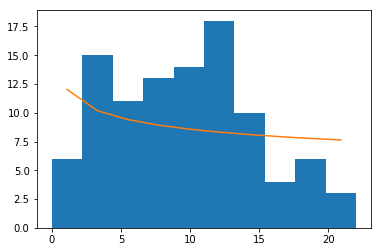

In [8]:
hist = plt.hist([g.in_degree(n) for n in g.nodes])
xdata = [(l + r) / 2 for l, r in zip(hist[1][:-1], hist[1][1:])]
ydata = [h + 1 for h in hist[0]]

reg = linregress(np.log(xdata), np.log(ydata))

plt.plot(xdata, [x ** reg[0] * np.exp(reg[1]) - 1 for x in xdata])

plt.show()

### Gravação

In [9]:
nx.write_gml(g, 'saida.gml')